In [26]:
!pip install opencv-python

  Obtaining dependency information for opencv-python from https://files.pythonhosted.org/packages/76/9e/4d47a69d3338a00c51535028d25a7d1a17c4762e4a46ae6a577f495de252/opencv_python-4.10.0.82-cp37-abi3-win_amd64.whl.metadata
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB ? eta -:--:--
   ---------------------------------------- 0.0/38.8 MB 325.1 kB/s eta 0:02:00
   ---------------------------------------- 0.0/38.8 MB 326.8 kB/s eta 0:01:59
   ---------------------------------------- 0.1/38.8 MB 409.6 kB/s eta 0:01:35
   ---------------------------------------- 0.1/38.8 MB 456.6 kB/s eta 0:01:25
   ---------------------------------------- 0.1/38.8 MB 403.5 kB/s eta 0:01:37
   ---------------------------------------- 0.1/38.8 MB 385.0 kB/s eta 0:01:41
   ---------------------------------------- 0.1/38.8 MB 385.0 kB/s eta 0:01:41
   ---------------------------------------- 0.1/38.8 MB 385.0 kB/s eta 0:01:41
   ---

In [5]:
# dataset extraction
from zipfile import ZipFile

dataset_train = "C:/Users/ASUS/Documents/Prodigy_Tasks/train.zip"
    
with ZipFile(dataset_train, 'r') as zip:
    zip.extractall()

In [26]:
import os
folder_path = f"C:/Users/ASUS/Documents/Prodigy_Tasks/"
os.makedirs(folder_path, exist_ok=True)

# define path
confusion_image_path = os.path.join(folder_path, 'confusion matrix.png')
classification_file_path = os.path.join(folder_path, 'classification_report.txt')
model_file_path = os.path.join(folder_path, "svm_model.pkl")

# Path dataset
dataset_dir = "C:/Users/ASUS/Documents/Prodigy_Tasks/Dataset/"
train_dir = os.path.join(dataset_dir, "train")
test_dir = os.path.join(dataset_dir, "test1")

In [39]:
from tqdm import tqdm
import cv2
# load data, preprocessing data, and labeling
# dog = 1, cat = 0
train_images = os.listdir(train_dir)
features = []
labels = []
image_size = (50, 50)

# Proses train images
for image in tqdm(train_images, desc="Processing Train Images"):
    if image.startswith('cat'):
        label = 0
    else :
        label = 1
    image_read = cv2.imread(train_dir+"/"+image)
    image_resized = cv2.resize(image_read, image_size)
    image_normalized = image_resized / 255.0
    image_flatten = image_normalized.flatten()
    features.append(image_flatten)
    labels.append(label)

Processing Train Images: 100%|██████████| 25000/25000 [01:03<00:00, 391.72it/s]


In [40]:
print(f"Processed {len(features)} images.")

# Delete train_images to free up memory
del train_images

Processed 25000 images.


In [41]:
type(features)

list

In [42]:
# Convert to numpy arrays
import numpy as np
features = np.asarray(features)
labels = np.asarray(labels)

from sklearn.model_selection import train_test_split
# train test split
X_train, X_test, y_train, y_test = train_test_split(features, labels, test_size=0.2, shuffle=True, random_state=42)

In [13]:
#Delete lists to free up memory
del features
del labels

In [14]:
print(f"Training samples: {len(X_train)}, Testing samples: {len(X_test)}")

Training samples: 20000, Testing samples: 5000


In [43]:
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline

# PCA, SVM, & Pipeline
n_components = 0.8 # Retain 80% of the variance
pca = PCA(n_components=n_components)
svm = SVC()
pca = PCA(n_components=n_components, random_state=42)
pipeline = Pipeline([
    ('pca', pca),
    ('svm', svm)
])

In [20]:
# Train the model
pipeline.fit(X_train, y_train)

print("Model training completed.")

Model training completed.


### Cross-Validation and Grid Search: Hyperparameter Tuning (a technique of fine-tuning)

In [44]:
param_grid = {
    'pca__n_components': [2, 1, 0.9, 0.8],
    'svm__kernel': ['linear', 'rbf', 'poly', 'sigmoid'],
}

In [ ]:
import time
from sklearn.model_selection import GridSearchCV
# Hitung waktu training
start_time = time.time()

grid_search = GridSearchCV(pipeline, param_grid, cv=3, verbose=4)
grid_search.fit(X_train, y_train)

# Hitung waktu training
end_time = time.time()

Fitting 3 folds for each of 16 candidates, totalling 48 fits
[CV 1/3] END pca__n_components=2, svm__kernel=linear;, score=0.528 total time=  16.9s
[CV 2/3] END pca__n_components=2, svm__kernel=linear;, score=0.525 total time=  16.6s
[CV 3/3] END pca__n_components=2, svm__kernel=linear;, score=0.537 total time=  16.7s
[CV 1/3] END pca__n_components=2, svm__kernel=rbf;, score=0.570 total time=  17.8s
[CV 2/3] END pca__n_components=2, svm__kernel=rbf;, score=0.560 total time=  17.1s
[CV 3/3] END pca__n_components=2, svm__kernel=rbf;, score=0.564 total time=  16.3s
[CV 1/3] END pca__n_components=2, svm__kernel=poly;, score=0.504 total time=  10.8s
[CV 2/3] END pca__n_components=2, svm__kernel=poly;, score=0.485 total time=  10.7s
[CV 3/3] END pca__n_components=2, svm__kernel=poly;, score=0.492 total time=  10.6s
[CV 1/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.507 total time=   9.7s
[CV 2/3] END pca__n_components=2, svm__kernel=sigmoid;, score=0.495 total time=   9.9s
[CV 3/

In [21]:
del X_train
del y_train

In [ ]:
#####
best_pipeline = grid_search.best_estimator_
best_params = grid_search.best_params_
best_score = grid_search.best_score_

print("Best Parameters: ", best_params)
print("Best Score: ", best_score)

In [ ]:
# Evaluation on test dataset
accuracy = best_pipeline.score(X_test, y_test)
print("Accuracy:", accuracy)

### end of Cross-Validation and Grid Search Method

In [24]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Predict on the test set
y_pred = pipeline.predict(X_test)

# Evaluation metrics
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

print("\nAccuracy Score:")
print(accuracy_score(y_test, y_pred))


Confusion Matrix:
[[1689  826]
 [ 801 1684]]

Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.67      0.67      2515
           1       0.67      0.68      0.67      2485

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000


Accuracy Score:
0.6746


## -------OS method---------

In [27]:
# classification report
target_names = ['Cat', 'Dog']
classification_rep = classification_report(y_test, y_pred, target_names=target_names)
print("Classification Report:\n", classification_rep)

with open(classification_file_path, 'w') as file:
    file.write(classification_rep)

Classification Report:
               precision    recall  f1-score   support

         Cat       0.68      0.67      0.67      2515
         Dog       0.67      0.68      0.67      2485

    accuracy                           0.67      5000
   macro avg       0.67      0.67      0.67      5000
weighted avg       0.67      0.67      0.67      5000



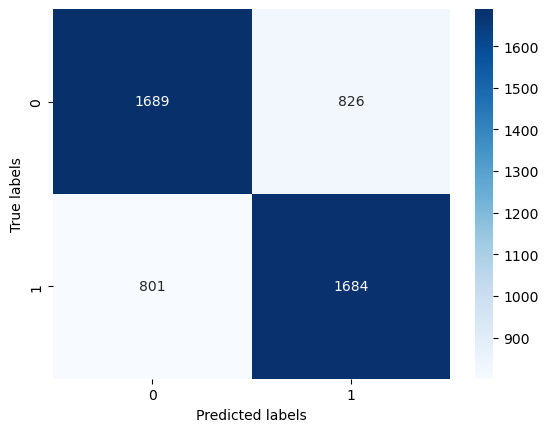

In [30]:
import matplotlib.pyplot as plt
import seaborn as sns
# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.savefig(confusion_image_path)
plt.show()

In [32]:
import joblib
# Save the model
joblib.dump(pipeline, model_file_path)
print(f"Model saved to {model_file_path}")

Model saved to C:/Users/ASUS/Documents/Prodigy_Tasks/svm_model.pkl
